# 1. Introdução:
A análise abaixo foi feita utilizando dados do RH da IBM que foram disponibilizados no site www.kaggle.com.

Nossa motivação é entender o perfil das pessoas que deixam a empresa. O que pode ser importante para prevenir demissões, diminuir custos operacionais e melhorar a satisfação dos empregados (melhorando a produtividade da empresa).

Perguntas que tentaremos responder:
- Existe uma disparidade salarial real entre homens e mulheres? 
- Há alguma evidência de que gênero tenha impacto no atrito entre funcionário e empresa? 
- Qual a relação entre salário e departamento em que o funcionário atua? 





 Fonte do Dataset:

**Nota pessoal**: *Forma de pensar na análise -> Analisar o dataset (estrutura) - Análise Univariada (uma variavel de cada vez) -> Análise Bivariada ou Multivariada (cruzar variáveis, como: qtd homens e mulheres em cada departamento; a moda de formação de cada departamento; média de idade entre os funcionarios que se demitem e os que continuam...) ->  Machine Learning*

### Carregando Bibliotecas:

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import time
import multiprocessing as mp
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit
import latexify
import random

### Carregando Dataset e entendendo:

In [3]:
rh = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.xls')

In [4]:
rh

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
rh.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Análise Univariada:

In [19]:
round(rh.Age.mean() - rh.Age.std(),2)

27.79

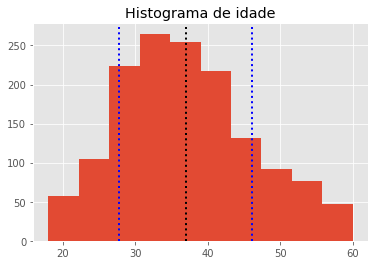

Cerca de 70% dos funcionários estão na faixa entre: 27.8~46.1 anos de idade.
A média de idade sendo: 36.9


In [25]:
## Alterando o estilo dos plots:
plt.style.use('ggplot')
## vendo a distribuição de idade
_ = plt.hist(rh.Age)
_ = plt.title('Histograma de idade')
plt.axvline(rh.Age.mean(), color='k', linestyle='dotted', linewidth=2) 
plt.axvline(rh.Age.std() + rh.Age.mean(), color='b', linestyle='dotted', linewidth=2) #1sigma
plt.axvline(rh.Age.mean() - rh.Age.std(), color='b', linestyle='dotted', linewidth=2) 
plt.show()
print('Cerca de 70% dos funcionários estão na faixa entre: '+str(round(rh.Age.mean() - rh.Age.std(),1)) +
      '~'+str(round(rh.Age.mean() + rh.Age.std(),1)) + ' anos de idade.\n'+'A média de idade sendo: '+
     str(round(rh.Age.mean(),1)))

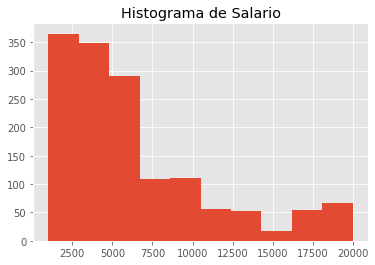

In [26]:
_ = plt.hist(rh.MonthlyIncome)
_ = plt.title('Histograma de Salario')

In [27]:
rh.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [28]:
## em percentual:
rh.Gender.value_counts(1)

Male      0.6
Female    0.4
Name: Gender, dtype: float64

In [30]:
rh.EducationField.value_counts(1)

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

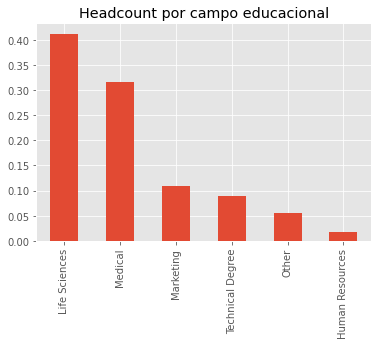

In [33]:
## emendando no plot
rh.EducationField.value_counts(1).plot.bar()
plt.title('Headcount por campo educacional')
plt.show()

Vemos que a maioria dos funcionários é formado na área de Life Sciences. Na sequencia temos muitos funcionários da àrea medical, Marketing. A área com menos funcionários formados é a de Human Resources. 

**podemos criar hipóteses** 
Por ser uma empresa que contrata muitas pessoas da área de STEM, é esperado mais homens.
No entanto, é visto que a maior parte é formado em Life Science. 
etc...

### Análise Bivariada

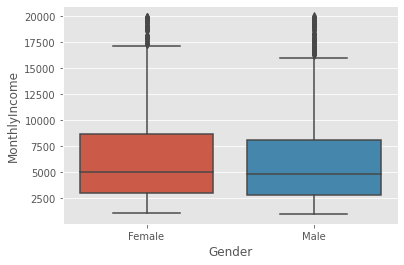

In [35]:
sns.boxplot(x = 'Gender', y = 'MonthlyIncome', data = rh)
plt.show()

Curiosamente, a distribuição salarial entre homens e mulheres é bem parecida. Normalmente, espera-se encontrar salários maiores para homens. Neste caso, o gender gap parece não ocorrer.

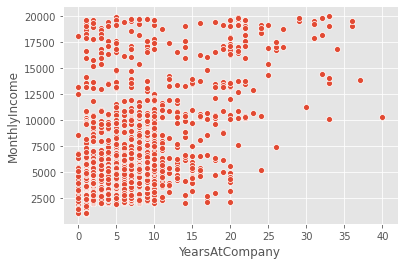

In [37]:
sns.scatterplot(x = 'YearsAtCompany', y = 'MonthlyIncome', data = rh)
plt.show()

É esperado que parte das pessoas que mais se movimentam entre empresas (profissionais mais requisitados) ganhem mais, ao mesmo tempo que também se espera que quanto mais tempo de empresa, mais promoções podem ocorrer. É curioso levantar ambas as variáveis (Anos na empresa e salário). 

No caso da IBM, ambas as hipóteses parecem ter impacto, mas uma delas tem mais força. Podemos ver uma quantidade maior de funcionários que estão a menos de 10 anos na empresa e, dentre eles, alguns conseguiram alcançar o salário pico. No entanto, dentre os poucos funcionários que são mais veteranos, a concentração de salários maiores foi maior. 

**ideia**: *calcular a % funcionarios 'novos' (menos de 10 anos) com salários acima de 15.000 e dps calcular a % de funcionarios veteranos com salarios acima de 15.000. Pegar valores relativos (espaço amostral diferente pra cada caso).* 

### Anpalise Multivariada

In [63]:
rh.corr() #correlações entre variaveis, pearson é standard

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


 - Perceba que a correlação entre tempo na empresa e salario não é tão alta:   

In [60]:
(rh.corr()['YearsAtCompany'])['MonthlyIncome']

0.5142848257331964

Assim como não achamos correlações muito altas entre idade e cargo:

In [61]:
(rh.corr()['Age'])['JobLevel']

0.5096042284323877

**Ideia:** calcular a probabilidade de haver correlação entre estes dois casos.

In [53]:
pandas.DataFrame.corr?

Object `pandas.DataFrame.corr` not found.


A menor correlação encontrada foi entre YearsAtCompany e NumCompaniesWorked. Bem intuitivo, já que quanto mais tempo na empresa, menor a probabilidade do funcionario ter passado por várias outras.

In [69]:
(rh.corr()['YearsAtCompany'])['NumCompaniesWorked']

-0.11842134024259048

In [71]:
rh.corr(method = 'kendall') #Usando metodo kendall

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.005433,-0.013578,0.156359,NaN,-0.001361,0.007205,0.019842,0.027155,0.390040,...,0.035101,NaN,0.043757,0.502030,0.000384,-0.003008,0.186919,0.145581,0.129532,0.143702
DailyRate,0.005433,1.000000,-0.002029,-0.010262,NaN,-0.034280,0.014251,0.016151,0.033213,0.003021,...,0.007211,NaN,0.029716,0.014613,-0.008499,-0.031298,-0.007025,0.004900,-0.027504,-0.003418
DistanceFromHome,-0.013578,-0.002029,1.000000,0.012447,NaN,0.027073,-0.008096,0.014749,0.027867,0.017432,...,0.004508,NaN,0.023961,-0.001818,-0.017881,-0.016392,0.007533,0.009985,-0.003318,0.003116
Education,0.156359,-0.010262,0.012447,1.000000,NaN,0.031916,-0.023141,0.010916,0.032382,0.090791,...,-0.011052,NaN,0.011919,0.124397,-0.019867,0.015029,0.049947,0.043307,0.026344,0.040659
EmployeeCount,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.001361,-0.034280,0.027073,0.031916,NaN,1.000000,0.016491,0.023566,-0.001904,-0.008462,...,-0.054488,NaN,0.045851,-0.002734,0.019516,0.007764,0.008635,-0.001084,0.005635,-0.003706
EnvironmentSatisfaction,0.007205,0.014251,-0.008096,-0.023141,NaN,0.016491,1.000000,-0.039248,-0.013299,-0.000120,...,0.004550,NaN,0.008535,-0.010468,-0.009836,0.023730,0.006244,0.015962,0.021409,-0.001499
HourlyRate,0.019842,0.016151,0.014749,0.010916,NaN,0.023566,-0.039248,1.000000,0.034041,-0.025713,...,0.000299,NaN,0.039736,-0.008307,0.000224,-0.007805,-0.020162,-0.023731,-0.038773,-0.010013
JobInvolvement,0.027155,0.033213,0.027867,0.032382,NaN,-0.001904,-0.013299,0.034041,1.000000,-0.016119,...,0.033061,NaN,0.031196,0.004915,0.001726,-0.017832,0.010814,0.012845,-0.007127,0.031121
JobLevel,0.390040,0.003021,0.017432,0.090791,NaN,-0.008462,-0.000120,-0.025713,-0.016119,1.000000,...,0.009581,NaN,0.040988,0.615243,-0.016511,0.035463,0.387734,0.321828,0.223978,0.305682
